In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Run SVM model to predict the full price
write a short summery here

In [47]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for SVM Regressor:
{'Model': 'SVM Regressor', 'Train R2': -0.00448601129765458, 'Train RMSE': 370.2388997025838, 'Train MSE': 137076.84285297993, 'Train MAE': 308.73993578460573, 'Test R2': -0.005909074014234683, 'Test RMSE': 371.95668813425493, 'Test MSE': 138351.7778478034, 'Test MAE': 310.2905077406069, 'Train Size': 29338, 'Test Size': 12574}


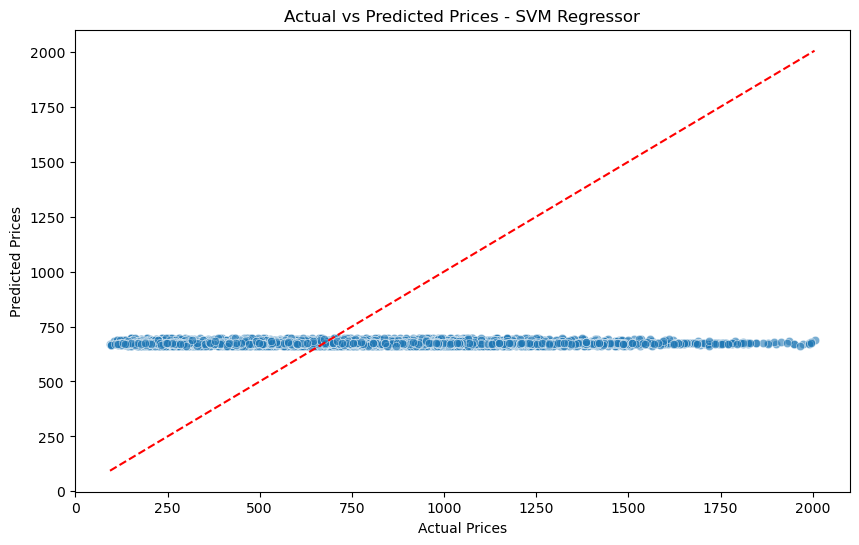

In [48]:
# Function to run SVM Regressor and calculate metrics
def run_svm_regressor(df):
    # Remove columns that are not needed for regression
    columns_to_use = ['TTT', 'LOS', 'score',
           'reviews', 'full_price',
           'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
           'star_rating', 'location_rating',
           'km_from_center']
    df = df[columns_to_use]
    
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize SVM Regressor
    model = SVR()
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'SVM Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run SVM Regressor
results, y_test, y_test_pred = run_svm_regressor(df)


# Display results
print("Results for SVM Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - SVM Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

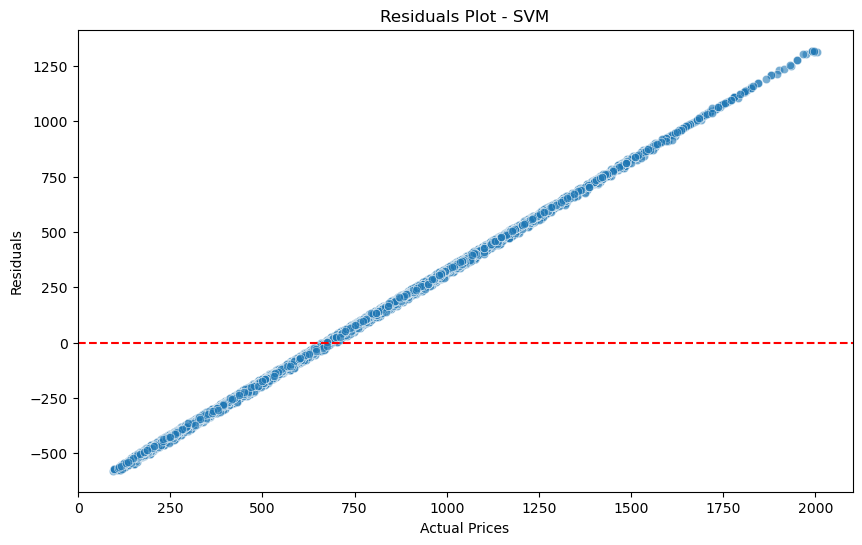

In [49]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - SVM')
plt.show()

# Run SVM model after feature engineering to predict full price

In [50]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for SVM Regressor:
{'Model': 'SVM Regressor', 'Train R2': -0.0041635705412319535, 'Train RMSE': 371.78330379585736, 'Train MSE': 138222.82498136276, 'Train MAE': 310.8317482077509, 'Test R2': -0.004129160039476609, 'Test RMSE': 367.88294171906455, 'Test MSE': 135337.85880787263, 'Test MAE': 305.37332804465706, 'Train Size': 29338, 'Test Size': 12574}


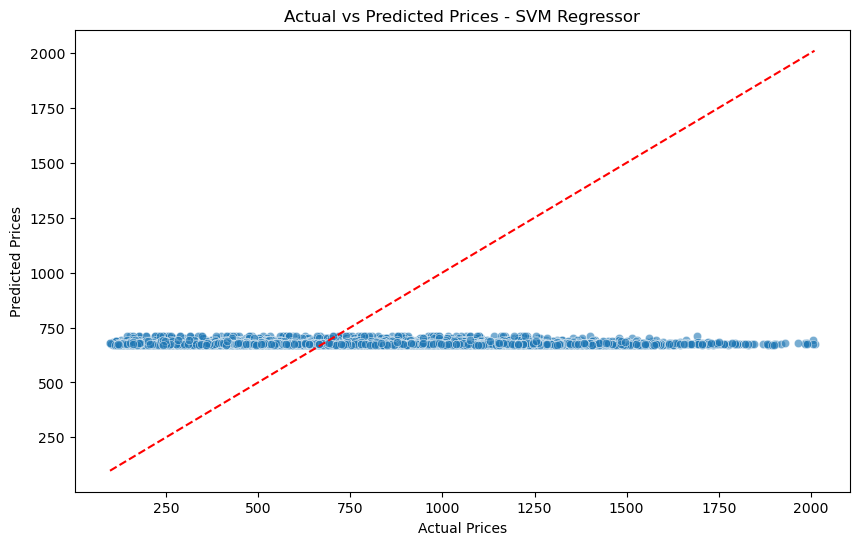

In [51]:
# Function to run SVM Regressor and calculate metrics
def run_svm_regressor(df):
    # Remove columns that are not needed for regression
    columns_to_use = ['TTT', 'LOS', 'score',
           'reviews', 'full_price',
           'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
           'star_rating', 'location_rating',
           'km_from_center',
           'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
           'checkin_day_name_Monday', 'checkin_day_name_Saturday',
           'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
           'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
           'checkin_day_name_nan', 'checkout_day_name_Friday',
           'checkout_day_name_Monday', 'checkout_day_name_Saturday',
           'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
           'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
           'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
           'period_of_the_month_end of the month',
           'period_of_the_month_middle of the month']
    df = df[columns_to_use]
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize SVM Regressor
    model = SVR()
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'SVM Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run SVM Regressor
results, y_test, y_test_pred = run_svm_regressor(df)


# Display results
print("Results for SVM Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - SVM Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

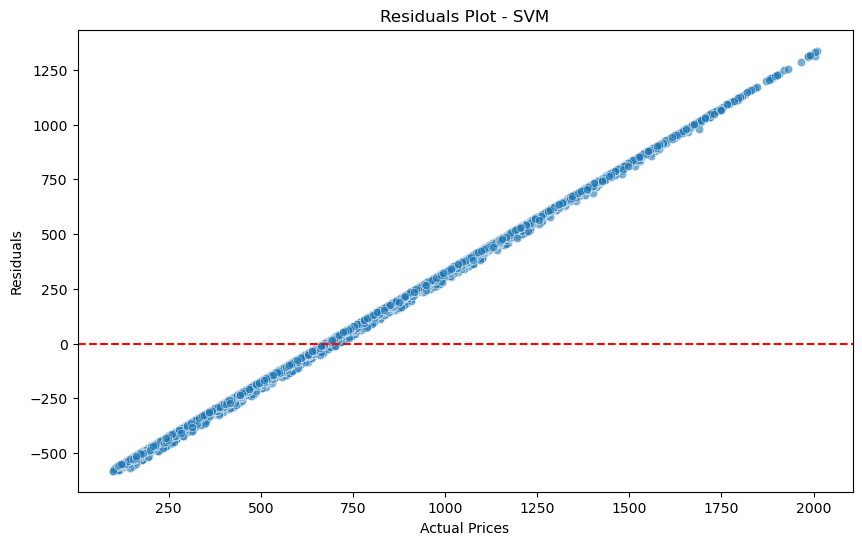

In [52]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - SVM')
plt.show()

# Repeat the process but on data after normalization
1. Linear regression on normalized data
2. Linear regression on normalized data with features engineering

In [2]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for SVM Regressor:
{'Model': 'SVM Regressor', 'Train R2': 0.8448078633445992, 'Train RMSE': 0.39348691794298657, 'Train MSE': 0.15483195459227064, 'Train MAE': 0.2824426885284477, 'Test R2': 0.8460619531307769, 'Test RMSE': 0.39337908164973184, 'Test MSE': 0.1547471018795864, 'Test MAE': 0.28416516914839496, 'Train Size': 29275, 'Test Size': 12547}


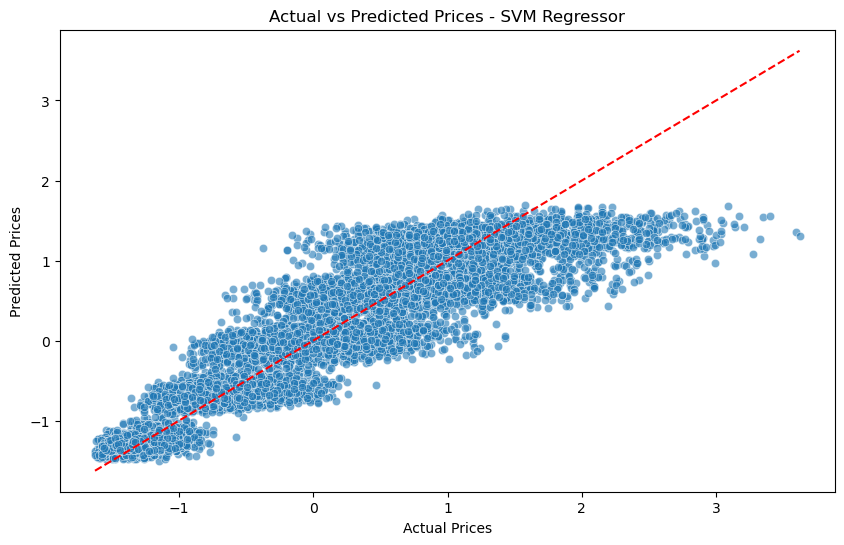

In [3]:
# Function to run SVM Regressor and calculate metrics
def run_svm_regressor(df):
    # Remove columns that are not needed for regression
    columns_to_use = ['TTT', 'LOS', 'score',
           'reviews', 'full_price',
           'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
           'star_rating', 'location_rating',
           'km_from_center']
    df = df[columns_to_use]
    
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize SVM Regressor
    model = SVR()
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'SVM Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run SVM Regressor
results, y_test, y_test_pred = run_svm_regressor(df)


# Display results
print("Results for SVM Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - SVM Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

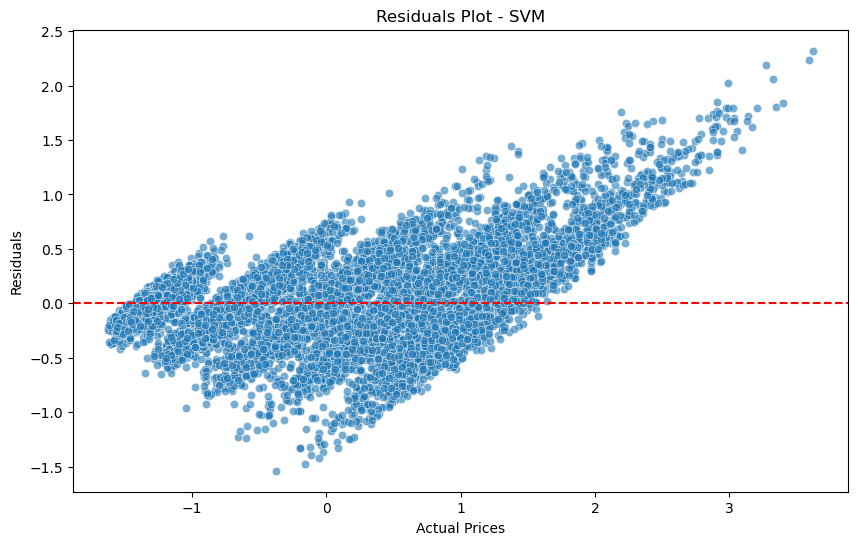

In [4]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - SVM')
plt.show()

In [5]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for SVM Regressor:
{'Model': 'SVM Regressor', 'Train R2': 0.8747890409612975, 'Train RMSE': 0.3540882411663484, 'Train MSE': 0.12537848253227812, 'Train MAE': 0.25287302574867304, 'Test R2': 0.8710604883765234, 'Test RMSE': 0.3584632252264897, 'Test MSE': 0.1284958838397771, 'Test MAE': 0.2569455644405907, 'Train Size': 29275, 'Test Size': 12547}


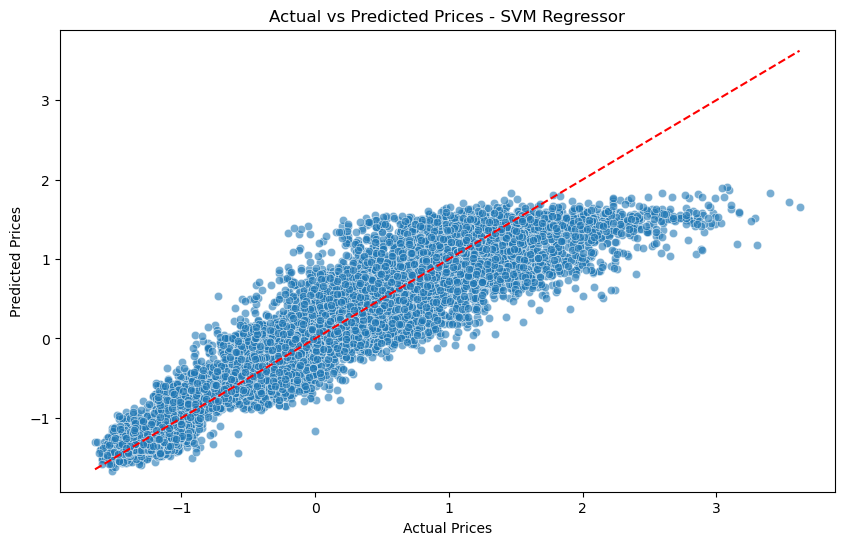

In [6]:
# Function to run SVM Regressor and calculate metrics
def run_svm_regressor(df):
    # Remove columns that are not needed for regression
    columns_to_use = ['TTT', 'LOS', 'score',
           'reviews', 'full_price',
           'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
           'star_rating', 'location_rating',
           'km_from_center',
           'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
           'checkin_day_name_Monday', 'checkin_day_name_Saturday',
           'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
           'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
           'checkin_day_name_nan', 'checkout_day_name_Friday',
           'checkout_day_name_Monday', 'checkout_day_name_Saturday',
           'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
           'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
           'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
           'period_of_the_month_end of the month',
           'period_of_the_month_middle of the month']
    df = df[columns_to_use]
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize SVM Regressor
    model = SVR()
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'SVM Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run SVM Regressor
results, y_test, y_test_pred = run_svm_regressor(df)


# Display results
print("Results for SVM Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - SVM Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

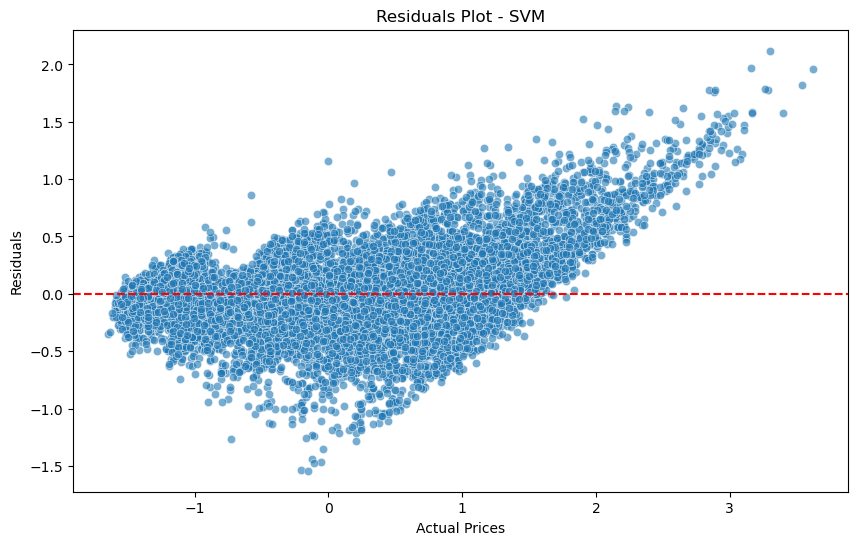

In [7]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - SVM')
plt.show()

# Summary of SVM Regressor Results

* Initial SVM Regressor Model - The initial SVM Regressor model performs poorly, with negative R2 values indicating that the model fails to capture any meaningful relationship between the features and the target variable. The high error metrics further confirm the model's inadequacy.

* SVM Regressor with Feature Engineering - Feature engineering does not improve the SVM model's performance significantly. The R2 values remain negative, and the error metrics are still high, indicating poor predictive capability.

* SVM Regressor with Data Normalization - Normalization dramatically improves the SVM Regressor's performance. The model achieves high R2 values, indicating a good fit to the data. The error metrics are also significantly lower, demonstrating better predictive accuracy.

* SVM Regressor with Feature Engineering and Data Normalization - Combining feature engineering with normalization further enhances the SVM model's performance. The highest R2 scores and the lowest error metrics across all the approaches indicate excellent predictive capabilities and generalization.

# Conclusion
* Initial Model: Performs poorly with negative R2 values and high error metrics.
* Feature Engineering: Does not significantly improve the model; the performance remains poor.
* Data Normalization: Substantially enhances the model, achieving high R2 values and low error metrics.
* Combined Feature Engineering and Normalization: Provides the best performance, achieving the highest accuracy and lowest errors.

The SVM Regressor, particularly with data normalization and combined with feature engineering, demonstrates strong predictive capabilities and excellent generalization to new data.